# 図 2.6 の生成

In [ ]:
! pip install POT

In [ ]:
! mkdir "imgs" -p
! wget "https://github.com/joisino/otbook/raw/main/notebooks/imgs/source1.jpg" -O "imgs/source1.jpg"
! wget "https://github.com/joisino/otbook/raw/main/notebooks/imgs/target1.jpg" -O "imgs/target1.jpg"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import ot
from sklearn.cluster import MiniBatchKMeans

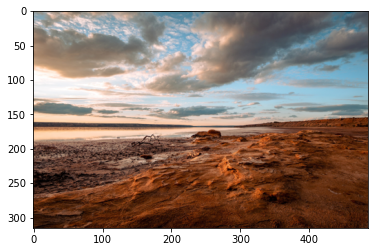

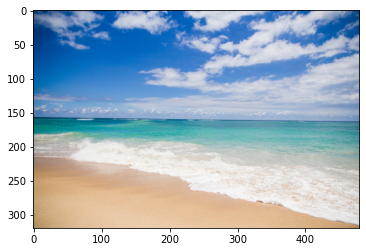

In [2]:
resolution = 480 * 320 # 解像度

im1 = Image.open('./imgs/source1.jpg') # 画像の読み込み
w1, h1 = im1.size
r = np.sqrt(resolution / (w1 * h1))
im1 = im1.resize((int(w1 * r), int(h1 * r))) # 画像のリサイズ
w1, h1 = im1.size
x1 = np.array(im1).reshape(-1, 3)

im2 = Image.open('./imgs/target1.jpg') # 画像の読み込み
w2, h2 = im2.size
r = np.sqrt(resolution / (w2 * h2))
im2 = im2.resize((int(w2 * r), int(h2 * r))) # 画像のリサイズ
w2, h2 = im2.size
x2 = np.array(im2).reshape(-1, 3)

plt.imshow(im1)
plt.show()
plt.clf()
plt.imshow(im2)

In [3]:
# k-means による点群の代表点の生成
n = 500
kmeans1 = MiniBatchKMeans(n, random_state=0)
kmeans1.fit(x1)
c1 = kmeans1.predict(x1)
sx1 = kmeans1.cluster_centers_
a = np.bincount(c1, minlength=n) / len(x1) # 重みの計算

kmeans2 = MiniBatchKMeans(n, random_state=0)
kmeans2.fit(x2)
c2 = kmeans2.predict(x2)
sx2 = kmeans2.cluster_centers_
b = np.bincount(c2, minlength=n) / len(x2) # 重みの計算

Text(0.5, 0, 'B')

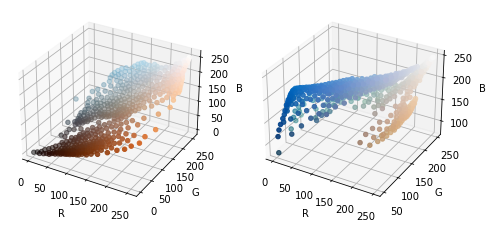

In [4]:
# 点群の描画
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter3D(sx1[:, 0], sx1[:, 1], sx1[:, 2], c=sx1 / 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

ax = fig.add_subplot(122, projection='3d')
ax.scatter3D(sx2[:, 0], sx2[:, 1], sx2[:, 2], c=sx2 / 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

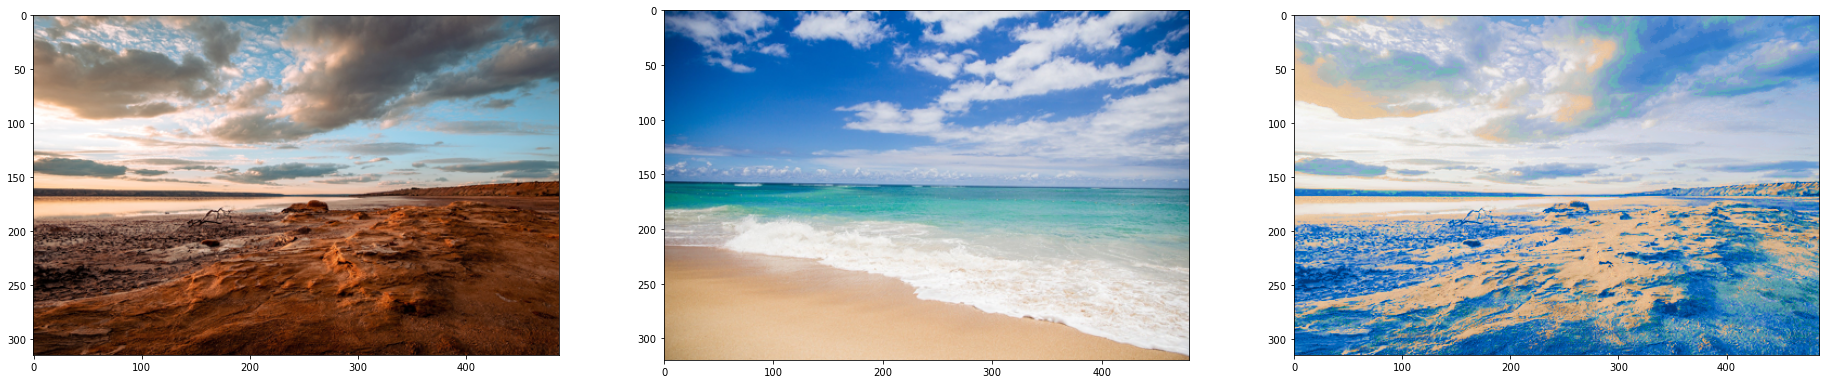

In [5]:
C = np.linalg.norm(sx1.reshape(-1, 1, 3) - sx2.reshape(1, -1, 3), axis=2) ** 2 # コスト行列の計算
P = ot.emd(a, b, C) # 最適輸送行列の計算

csx1 = P @ sx2 / a.reshape(n, 1) # 式 (2.52)

cx1 = x1.copy()
for i in range(len(x1)):
    j = c1[i]
    cx1[i] = np.maximum(0, np.minimum(csx1[j] + x1[i] - sx1[j], 255)) # 式 (2.51)

res = Image.fromarray(cx1.reshape(h1, w1, 3))
fig = plt.figure(figsize=(32, 8))
ax = fig.add_subplot(131)
ax.imshow(im1)
ax = fig.add_subplot(132)
ax.imshow(im2)
ax = fig.add_subplot(133)
ax.imshow(res)